# Introducción al Machine Learning - Semana 1
## Taller: Calibración y comparación de modelos con validación cruzada
### Propósito de la actividad
En esta actividad podrá poner en práctica procedimientos de partición de muestras y utilizarlos para la implementación y calibración de un modelo de k vecinos.

### Instrucciones generales

1. Esta actividad es para que la desarrolle individualmente. Para hacerlo, deberá descargar este notebook eligiendo la opción ‘Download as’ del menú ‘File’ y descargar el archivo en formato notebook (.ipynb).

2. Para que la actividad sea calificada, deberá subir únicamente el archivo del notebook en el que trabajó, a la actividad de "entrega calificada por el personal" correspondiente a este taller y que encuentra en la plataforma después de esta actividad. El archivo deberá subirlo en el mismo formato en el que lo descargó (con la extensión ".ipynb").


### Criterios de evaluación

Los criterios que se evaluarán son:   

Establecer valores posibles de k: Se evalúan todos los valores posibles para la cantidad de vecinos, es decir, desde 1 hasta n. [20 puntos]

Partición de muestras: Se utiliza validación cruzada como método de partición de muestras. [10 puntos]

Estimación del modelo: Se estima el modelo con la muestra de entrenamiento para cada iteración del procedimiento de validación cruzada. [30 puntos]

Evaluación del modelo: Se evalúa el modelo con la muestra de test para cada iteración del procedimiento de validación cruzada. [30 puntos]

Forma de la gráfica: Se presenta una gráfica con forma convexa. [10 puntos]


### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:


In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

### Cargando los datos

En primer lugar, cargaremos los datos a usar en este Notebook que corresponde a la base de datos "Diabetes" del paquete "sklearn". Para ello, ejecutaremos el siguiente código:

In [ ]:
XTotal, yTotal = datasets.load_diabetes(return_X_y=True)
datosTotal=len(XTotal)

### Separación de muestras en entrenamiento y evaluación

Luego, partiremos la base de datos en una sección de train y otra de test de la siguiente manera: utilizaremos el 67% de los datos para entrenamiento y el 33% restante para evaluación.

In [ ]:
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

De esta manera, si se quisiera que la muestra de evaluación tuviera únicamente el 25% de los datos y la de entrenamiento el 75%, se debería establecer en el parámetro "test_size" el número 0.25. Además, el parámetro "random_state" se establece con un número determinado (en este caso 0) para que siempre que ejecutemos este código, las particiones que se realicen sean las mismas.

### Implementación k vecinos

Una vez se realiza la partición, es posible estimar un modelo de machine learning con los datos de entrenamiento y utilizarlo para predecir el valor de la variable de respuesta en el conjunto de evaluación. En este caso, se presenta el código para estimar un modelo de k vecinos con k=3 (establecido en la variable "vecinos")

In [ ]:
vecinos=3
neigh = KNeighborsRegressor(n_neighbors=vecinos)
neigh.fit(XTrain, yTrain)

KNeighborsRegressor(n_neighbors=3)

Luego, podemos utilizar el modelo guardado en la variable "neigh" para predecir en el conjunto de evaluación utilizando la función "predict()"

In [ ]:
prediccionKVecinos=neigh.predict(XTest)

Finalmente, calculamos el MSE en test de la siguiente forma:

$$MSE_{test}=\frac{1}{n_{test}}\sum^{n_{test}}_{i=1}(\hat{y}_{i}-y_{i})^{2}$$

In [ ]:
MSEKvecinos=np.average(np.square(prediccionKVecinos-yTest))
mensaje = ['El MSE en test del modelo de K vecinos con k=', str(vecinos),'es igual a',str(MSEKvecinos)]
print(" ".join(mensaje))

El MSE en test del modelo de K vecinos con k= 3 es igual a 3987.0996955859973


### Separación de muestras por validación cruzada

Ahora, se presenta el código para separar la muestra total utilizando validación cruzada. En primer lugar, necesitaremos establecer el número de folds que se quieren utilizar para este procedimiento y, para este caso, escogeremos que sea igual a 10.

In [ ]:
folds=10

Luego, inicializaremos el objeto que permitirá hacer las particiones sobre los datos de acuerdo al número de folds establecido previamente:

In [ ]:
kf = KFold(n_splits=folds)

Después, procedemos a realizar la partición con las especificaciones anteriores sobre el conjunto de predictores totales:

In [ ]:
kf.get_n_splits(XTotal)

10

Finalmente se presenta el procedimiento que, para cada partición, establece el conjunto de variables (predictoras y de respuesta) que se utilizarían para estimar la función (X_trainCV y y_trainCV) y el conjunto de variables que se utilizarán para la muestra de evaluación (X_testCV y y_testCV).

In [ ]:
for train_index, test_index in kf.split(XTotal):
    X_trainCV, X_testCV = XTotal[train_index], XTotal[test_index]
    y_trainCV, y_testCV = yTotal[train_index], yTotal[test_index]

### Implementación de función
Ahora, en el siguiente espacio, deberá escribir una función que grafique la curva MSE utilizando validación cruzada en función del número de vecinos que varía entre 1 y la cantidad de datos totales. Esta función recibirá como parámetros únicamente a XTotal, yTotal y el número de folds (folds):

In [ ]:
# Escriba dentro de esta función el procedimiento solicitado anteriormente
def funcion_2(XTotal,yTotal,folds):

    # Escriba aquí su procedimiento
    # el maximo valor de k depende de los folds que se vaya a hacer durante cross validation
    # max_k = len(Xtotal) - math.ceil(len(XTotal) / folds)
    # o
    n = len(XTotal)
    max_k = (n//folds)*(folds-1)
    # un rango para los posibles valores de k
    k_values = range(1,(max_k+1)) # + 1 porque el segundo dato no se incluye al hacer un range

    #se inicializa el objeto para hacer la particion sobre los datos
    kf = KFold(n_splits=folds)
    mse_iteraciones_k = []

    for i in k_values:
        # primero se tienen que obtener cuales son los datos de entrenamiento para sobre esos construir el modelo k-vecinos
        # y como se hara lo de la cross validation, los datos de entrenamiento van a cambiar folds veces
        # este for se encarga de generar los datos de entrenamiento en cada iteracion del cross valdiation
        mse_iteraciones_cv = []
        for train_index, test_index in kf.split(XTotal):
            X_trainCV, X_testCV = XTotal[train_index], XTotal[test_index]
            y_trainCV, y_testCV = yTotal[train_index], yTotal[test_index]

            vecinos=i
            # se guarda el modelo en la variable neigh
            neigh = KNeighborsRegressor(n_neighbors=vecinos)
            neigh.fit(X_trainCV, y_trainCV)
            # se predicen los valores de y con los x de prueba
            prediccionKVecinos=neigh.predict(X_testCV)

            # se calcula el MSE para evaluar el modelo construido
            MSEKvecinos=np.average(np.square(prediccionKVecinos-y_testCV))
            mse_iteraciones_cv.append(MSEKvecinos)

        mse_iteraciones_k.append(np.mean(mse_iteraciones_cv))

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, mse_iteraciones_k, marker='o', linestyle='-', color='b')
    plt.title('Curva de MSE vs Número de Vecinos', fontsize=14)
    plt.xlabel('Número de Vecinos', fontsize=12)
    plt.ylabel('Error Cuadrático Medio (MSE)', fontsize=12)
    plt.show()

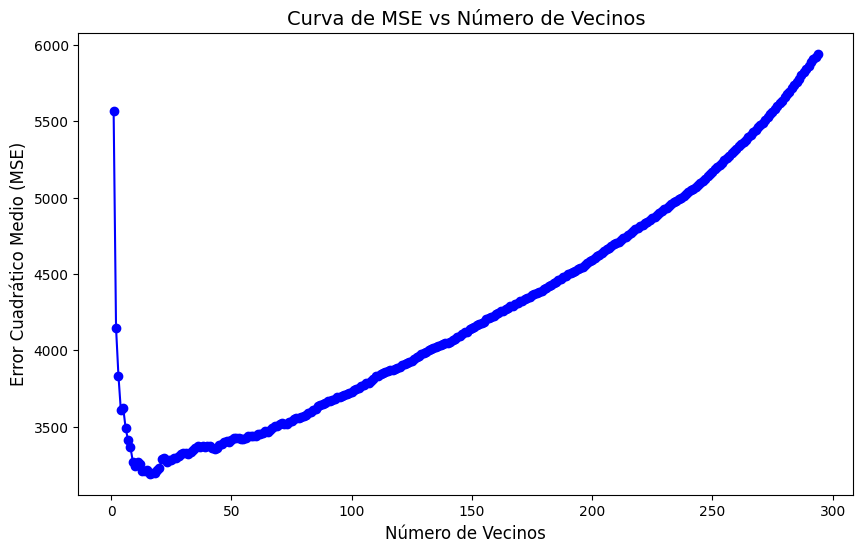

In [ ]:
funcion_2(XTotal,yTotal,3)

In [ ]:
def funcion(XTotal, yTotal, folds):
    # Inicializar el objeto KFold para validación cruzada
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    # Determinar el número máximo de vecinos permitidos
    max_neighbors = min(len(XTotal), len(XTotal) * (folds - 1) // folds)

    # Lista para almacenar los valores promedio del MSE para cada número de vecinos
    mse_values = []

    for n_neighbors in range(1, max_neighbors + 1):

        # Inicializar lista para almacenar MSE de cada fold
        mse_per_fold = []

        # Realizar validación cruzada
        for train_index, test_index in kf.split(XTotal):
            # Dividir los datos en conjuntos de entrenamiento y prueba
            X_train, X_test = XTotal[train_index], XTotal[test_index]
            y_train, y_test = yTotal[train_index], yTotal[test_index]

            # Crear el modelo de KNN con el número actual de vecinos
            knn = KNeighborsRegressor(n_neighbors=n_neighbors)

            # Entrenar el modelo
            knn.fit(X_train, y_train)

            # Predecir sobre el conjunto de prueba
            y_pred = knn.predict(X_test)

            # Calcular el MSE para este fold y agregarlo a la lista
            MSEKvecinos = np.average(np.square(y_pred - y_test))
            mse_per_fold.append(MSEKvecinos)

        # Calcular el promedio del MSE para este número de vecinos y almacenarlo
        mse_values.append(np.mean(mse_per_fold))

    # Graficar la curva del MSE
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_neighbors + 1), mse_values, marker='o', linestyle='-', color='b')
    plt.title('Curva de MSE vs Número de Vecinos', fontsize=14)
    plt.xlabel('Número de Vecinos', fontsize=12)
    plt.ylabel('Error Cuadrático Medio (MSE)', fontsize=12)
    plt.grid(True)
    plt.show()

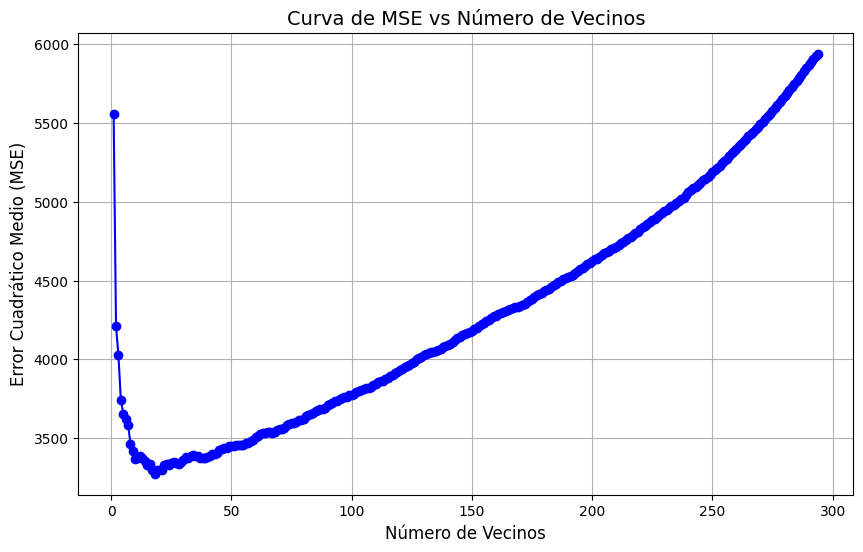

In [ ]:
funcion(XTotal, yTotal, 3)

In [ ]:
def funcion(XTotal, yTotal, folds):
    # Inicializar ol objeto Kfold
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    # Determinar el número máximo de vecinos permitidos
    max_neighbors = min(len(XTotal), len(XTotal) * (folds - 1) // folds)

    # Lista para almacenar los valores promedio del MSE para cada número de vecinos
    mse_values = []

    # Iterar sobre diferentes valores de vecinos
    for n_neighbors in range(1, max_neighbors + 1):

        # Inicializar lista para almacenar MSE de cada fold
        mse_per_fold = []

        # Realizar validación cruzada
        for train_index, test_index in kf.split(XTotal):
            # Dividir los datos en conjuntos de entrenamiento y prueba
            X_train, X_test = XTotal[train_index], XTotal[test_index]
            y_train, y_test = yTotal[train_index], yTotal[test_index]

            # Crear el modelo de KNN con el número actual de vecinos
            knn = KNeighborsRegressor(n_neighbors=n_neighbors)

            # Entrenar el modelo
            knn.fit(X_train, y_train)

            # Predecir sobre el conjunto de prueba
            y_pred = knn.predict(X_test)

            # Calcular el MSE para este fold y agregarlo a la lista
            MSEKvecinos = np.average(np.square(y_pred - y_test))
            mse_per_fold.append(MSEKvecinos)

        # Calcular el promedio del MSE para este número de vecinos y almacenarlo
        mse_values.append(np.mean(mse_per_fold))

    # Graficar la curva del MSE
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_neighbors + 1), mse_values, marker='o', linestyle='-', color='b')
    plt.title('Curva de MSE vs Número de Vecinos', fontsize=14)
    plt.xlabel('Número de Vecinos', fontsize=12)
    plt.ylabel('Error Cuadrático Medio (MSE)', fontsize=12)
    plt.grid(True)
    plt.show()


In [ ]:
kf = KFold(n_splits=6, shuffle=True, random_state=42)

folds = list(kf.split(XTotal))

for i, (train_index, test_index) in enumerate(folds):
    print(f"Grupo {i+1}:")
    print(f"  Índices: {test_index}")
    arr = np.array([0,9])
    result = np.all(np.isin(arr, test_index))
    print(result)

Grupo 1:
  Índices: [  0   9  11  15  19  25  30  33  39  42  55  56  70  72  73  75  76  77
  78  79  82 101 104 113 116 117 126 131 132 140 148 157 172 181 185 196
 199 203 209 211 218 227 244 268 281 284 286 287 291 307 311 320 321 329
 333 341 354 358 367 370 374 386 388 395 399 402 407 409 411 418 422 427
 429 436]
True
Grupo 2:
  Índices: [  3   5   7  16  17  18  22  24  26  29  31  45  46  57  60  63  66  84
  90  93  94 108 110 114 118 124 137 141 153 154 155 168 173 176 225 231
 237 238 239 245 255 278 280 285 296 298 316 324 325 327 332 346 349 351
 355 360 364 369 380 389 390 391 393 398 401 408 412 415 423 432 433 437
 439 440]
False
Grupo 3:
  Índices: [  2   6  10  36  38  59  69  74  81  83  89  92  96  97 103 109 111 119
 123 139 143 145 147 150 152 158 163 165 167 175 177 180 184 192 193 194
 195 198 204 208 210 220 222 229 246 247 249 250 261 265 275 277 294 301
 304 305 317 323 331 335 340 347 353 376 378 381 397 400 410 414 416 417
 419 421]
False
Grupo 4:
  Índice

In [ ]:
import math
n = 50
folds = 3
max_k = n - math.ceil(n / folds)
k_values = range(1,(max_k+1))

for i in k_values:
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


In [ ]:
n = 50
folds = 3
max_k = (n//folds)*(folds-1)
k_values = range(1,(max_k+1))

for i in k_values:
  print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
